In [1]:
EXPERIMENT_FOLDER_PATH = "../reports/experiments/2019-1-30_19-27/"

In [22]:
import os
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

In [12]:
exp_df=pd.DataFrame()

exp_id=1

for f in os.listdir(EXPERIMENT_FOLDER_PATH):
    if f.startswith("notebook_params"):
        param1 = f.split("_")[2]
        param2 = f.split("_")[-1].split(".")[:-1]
        param2 = ".".join(param2)
        
        df = pd.read_csv(EXPERIMENT_FOLDER_PATH+f)
        
        exp_id+=1
        df["exp_id"] = exp_id
        df["aug_type_no"] = param1
        df["magnitude"] = param2
        exp_df = pd.concat([exp_df, df])
        
exp_df.head()

,acc,loss,val_acc,val_loss,params_0,params_1,sample,exp_id,aug_type_no,magnitude
0,0.161,2.234,0.232,2.136,4,0.0,a,2,4,0.0
1,0.227,2.062,0.274,2.059,4,0.0,a,2,4,0.0
2,0.254,2.015,0.299,1.999,4,0.0,a,2,4,0.0
3,0.298,1.946,0.285,1.996,4,0.0,a,2,4,0.0
4,0.312,1.899,0.314,1.895,4,0.0,a,2,4,0.0


In [15]:
exp_df["sample"].unique()

array(['a', 'b', 'c', 'd', 'e'], dtype=object)

In [98]:
color_palette = ["red","blue","chocolate","salmon","green","pink","orange",
                 "purple","magenta","sienna","teal","khaki","yellow","darkgreen",
                 "darkblue", "cyan"]

def plot_exp_lines(monitor_col="val_loss"):
    
    rowList = []
    
    for exp_id in exp_df["exp_id"].unique():
        
        

        iter_df = exp_df[exp_df["exp_id"]==exp_id].copy()

        
        exp_color = color_palette[exp_id]
        
        if exp_df[exp_df["exp_id"]==exp_id]["params_1"].values[0]==0.0:
            exp_color="black"
        
        mean_last_scores = []
        
        for sample_id in iter_df["sample"].unique():
            sample_df = iter_df[iter_df["sample"]==sample_id].copy()
            xs = np.arange(1,16,1)
            plt.plot(xs, sample_df[monitor_col], color=exp_color, alpha=0.5, linewidth=2)
            
            mean_last_scores.append(sample_df[monitor_col].tail(3).mean())
            
        plt.title(monitor_col)
            
        score = np.mean(mean_last_scores)
        param1 = iter_df["params_0"].values[0]
        param2 = iter_df["params_1"].values[0]
        
        rowList.append([param1,param2,score])
        
    return pd.DataFrame(rowList, columns=["params_0","params_1","mean_last_"+monitor_col])

,params_0,params_1,mean_last_val_loss
11,3,0.000000,1.610467
4,2,0.353905,1.611800
0,4,0.000000,1.615200
12,2,0.000000,1.615667
9,1,0.247888,1.620000
13,2,0.552772,1.622333
7,2,0.913301,1.624400
2,2,0.018748,1.625400
10,1,0.453172,1.678133
8,1,0.839949,1.701467


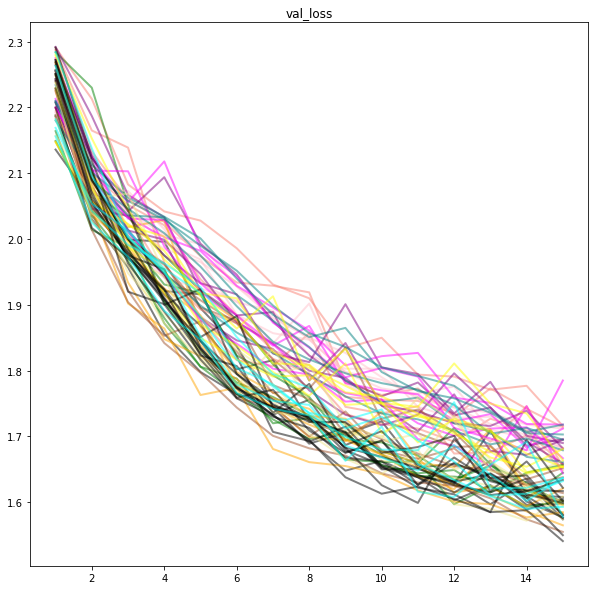

In [99]:
plt.figure(figsize=(10,10))
scores_df = plot_exp_lines("val_loss")
scores_df.sort_values("mean_last_val_loss", ascending=True)

,params_0,params_1,mean_last_val_acc
4,2,0.353905,0.414000
13,2,0.552772,0.410933
0,4,0.000000,0.410733
7,2,0.913301,0.410200
12,2,0.000000,0.410133
9,1,0.247888,0.409600
11,3,0.000000,0.409400
2,2,0.018748,0.407267
8,1,0.839949,0.392000
10,1,0.453172,0.389733


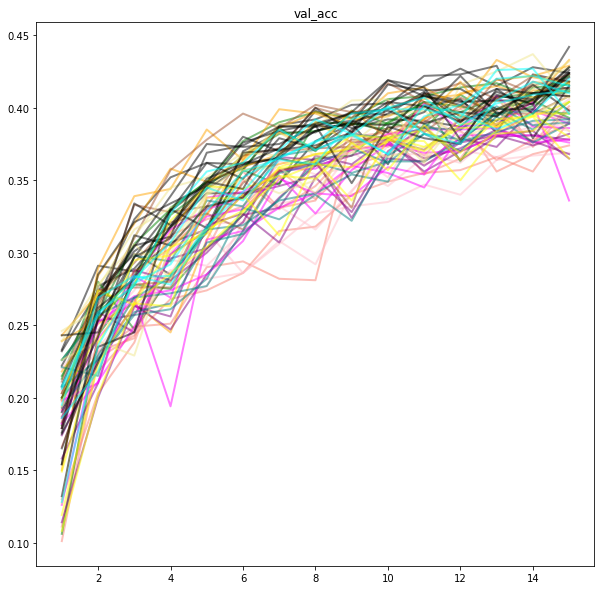

In [100]:
plt.figure(figsize=(10,10))
scores_df = plot_exp_lines("val_acc")
scores_df.sort_values("mean_last_val_acc", ascending=False)

,acc,loss,val_acc,val_loss,params_0,params_1,sample,exp_id,aug_type_no,magnitude
0,0.161,2.234,0.232,2.136,4,0.000000,a,2,4,0.0
1,0.227,2.062,0.274,2.059,4,0.000000,a,2,4,0.0
2,0.254,2.015,0.299,1.999,4,0.000000,a,2,4,0.0
3,0.298,1.946,0.285,1.996,4,0.000000,a,2,4,0.0
4,0.312,1.899,0.314,1.895,4,0.000000,a,2,4,0.0
5,0.333,1.825,0.370,1.837,4,0.000000,a,2,4,0.0
6,0.351,1.771,0.383,1.747,4,0.000000,a,2,4,0.0
7,0.368,1.712,0.383,1.730,4,0.000000,a,2,4,0.0
8,0.400,1.668,0.397,1.676,4,0.000000,a,2,4,0.0
9,0.398,1.637,0.395,1.693,4,0.000000,a,2,4,0.0
